<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL/blob/main/01_3_%EB%A7%88%EC%BC%93%EA%B3%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#알아두기

In [10]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv #fontcache 파일 제거하기
# !rm ~/.cache/matplotlib -rf #matplotlib 안의 캐시도 강제 제거

#위의 코드를 모두 실행 -> 런타임 다시시작 -> 주석처리 -> 외 모두 실행

In [11]:
%run my_init.py #매번 사용할 코드는 모듈화하여 실행

Mounted at /content/drive


In [12]:
%matplotlib inline

/content/drive/MyDrive/Colab Notebooks/01.머신러닝/D02/01.ipynb

In [13]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/머신러닝'

In [14]:
#세션에 생성됨(주의!)
%%writefile test.txt 
이 파일은 테스트 파일입니다.

Overwriting test.txt


In [15]:
import os

file_name = os.path.join(base_dir, 'test.txt')
print(file_name)

/content/drive/MyDrive/Colab Notebooks/머신러닝/test.txt


In [16]:
base_dir + '/test.txt'
#경로생성 방법은 편하게 선택

'/content/drive/MyDrive/Colab Notebooks/머신러닝/test.txt'

In [17]:
f = open(file_name, 'w')
f.write('이 파일은 테스트 파일입니다.\n')
f.close()

`f = open(file_name, 'w')<br> `  
f.write('이 파일은 테스트 파입니다.\n')<br>
f.close() 

>내용

>>내용

선형방정식은 $y = ax+b$ 와 같은 유형입니다.  $X_{i} + X_{i}^{2}$ 아래첨자 위첨자를 넣을 수 있음 + 중괄호를 쓰는 습관으 들여두기  
프로젝트 결과발표 등 수식을 표현할 때 이러한 레이텍을 많이 사용함
(인라인 모드)

$$y = ax+b$$
셀모드 (가운데 정렬)

https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols  
Greek letters 입력방법 참고

$\sum_{n=1}^{\infty} 2^{-n} = 1$

편차제곱합 = 분산  
$\sigma^2 = \sum_{i=1}^{\infty} (\bar{x}-x_i)^2$  

평균 = $\mu$(모평균), m(표본평균)  
i번째 값 = $x_i$  


$$\sigma^2 = \sum_{i=1}^{\infty} (\bar{x}-x_i)^2$$  

#01-3. 마켓과 머신러닝

###문제 -> 요구사항 -> 명세 -> 설계 -> 구현 -> 배치

문제의 유형을 미리 알아야 함  
수학,통계의 문제가 아닌 비정형문제가 등장하게 된다  
- 숫자(연속형) -> 회귀(Regression) -> 결과도 숫자(연속형)  
  - 무조건 숫자!
  - OLS기법(전통적 통계방식) 
  - Decision Tree기법(머신러닝 방식)-> 범주형 데이터도 입력 가능 -> 숫자값을 도출함  
따라서 , 회귀를 통해 해결할 수 없음  

- 숫자,문자(연속형,범주형) -> 분류(Classification) -> 숫자,문자(범주형)
  - 데이터의 타입에 상관없이 입력 가능  
  - 숫자도 범주형이 될 수 있을까?
    - 도미, 곤들매기, 농어, 강꼬치고기를
    - 1, 2, 3, 4 로 썼어도 이건 숫자가 아닌 범주형 데이터임
    - -----------------
    - 별점 1,2,3,4,5
    - 숫자로 되어있지만 연속형 숫자가 아닌 의미를 가지는 값이므로 범주형 데이터임 (아주좋음, 좋음, 보통, 나쁨, 아주나쁨과 다를게 없음)


- 아무거나 -> KNN알고리즘(K개의 가까운 이웃들) -> 범주형


- 분류(classification) : 여러개의 종류, 클래스(=범주,category) 중 하나를 구별해내는 문제  
  - 이진 분류(Binary classification) : 분류 중에서, 2개의 클래스 중 하나를 고르는 문제
  - 다중 분류 : binary 외 모두, 대부분 그냥 classification이라고 부름

In [18]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [19]:
len(bream_length)

35

In [20]:
len(bream_weight)

35

도미길이 >= 30  
이 Rule은 예외가 생길 때마다 고쳐줘야 함 -> 알아서 학습해서 그 기준을 정할 수 있게 하자

####클래스 = 범주
이진 분류를 한다면 다음과 같이 클래스를 나눈다.  
-> 양성 클래스(1) / 음성 클래스(0)  
-> 성공(1) / 실패(0)  
양성을 무엇으로 설정할 지가 제일 중요한 문제  


훈련 데이터 : 현재 같은 copy paste, csv, 크롤링 등등 다양하게 구할 수 있음  


In [21]:
#함수가 기억이 안날 때,
?plt.scatter #옆에 도움말을 띄울 수 있음 -> 문서 보는 연습 하는걸 추천

In [22]:
??plt.scatter

#Signature : 함수 원형, 프로토타입 설명
#Source : 함수 내부에 어떤 식으로 소스가 만들어져 있는지

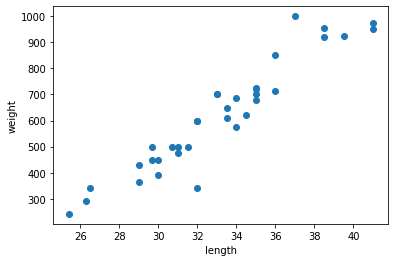

In [23]:
plt.rc('font',family='NanumBarunGothic')
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight'); #(tip!) plt.show()를 하지 않아도 세미콜론으로 끝내면 바로 그래프를 볼 수 있음

#어느 정도 선형 관계에 있음을 알 수 있다

In [24]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [25]:
print(f"빙어 length 개수 : {len(smelt_length)}, wight 개수 : {len(smelt_weight)}")

빙어 length 개수 : 14, wight 개수 : 14


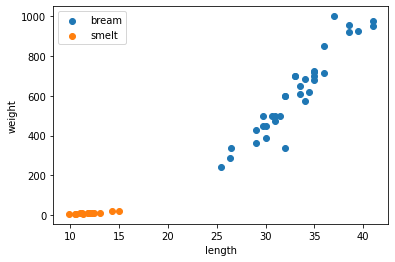

In [26]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.legend(['bream','smelt']);

###리스트 컴프리헨션 관련(필기 참조)
리스트와 제너레이터 효율성 비교

In [27]:
type(range(3))

range

In [28]:
for i in range(3):
  print(i)

0
1
2


In [29]:
a = list(range(10, 60 ,10))
b = list(range(10, 51 ,10)) #결과는 a와 동일하지만 51까지만 세면 됨
a,b

([10, 20, 30, 40, 50], [10, 20, 30, 40, 50])

In [30]:
c = list(range(1,6,1))
d = list(range(1,6))
c,d

([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

In [31]:
# zip() : 같은 인덱스끼리 쌍을 지어주는 함수
# zip(*p)에서 *, **이 붙은 파라미터 = unpack operator
#     *p = list관련
#     **p = dict관련(매개변수가 k=v 형태)

# 가변형 매개변수 사용법
# (positional arg, keyword arg) 순서 바꾸지 말기

zip(b,d) #generator 출력 -> loop돌려서 값을 출력할 수있다

In [32]:
for t in zip(b,d): #튜플로 한번에 꺼내기
  print(t)

(10, 1)
(20, 2)
(30, 3)
(40, 4)
(50, 5)


In [33]:
for x,y in zip(b,d): #각각의 원소로 꺼내기
  print(f"{x}, {y}")

10, 1
20, 2
30, 3
40, 4
50, 5


In [34]:
#np.hstack
#np.vstack 과 같이 편하게 쓸 수 있는 함수 존재

In [35]:
#리스트 컴프리헨션
data = [t for t in zip(b,d)]
data

[(10, 1), (20, 2), (30, 3), (40, 4), (50, 5)]

In [36]:
data2 = [(x,y) for x,y in zip(b,d)]
data2

#첫 번째 방법은 원본 그대로를 사용할 때만 가능함
#두 번째 방법은 원소 각각을 가공처리할 수 있음, 유연함 -> 익숙해지자

[(10, 1), (20, 2), (30, 3), (40, 4), (50, 5)]

In [37]:
data3 = [(x*2 ,y*3) for x,y in zip(b,d)]
data3

[(20, 3), (40, 6), (60, 9), (80, 12), (100, 15)]

####가변형 매개변수 사용법 추가 예제

In [38]:
a = [1,2,3]
b = {"x": 1, "y": 2}

In [39]:
def fn(*args, **kwargs): #(positional arg, keword arg)
  for i, arg in enumerate(args):
    print(f"{i}: {arg}")
  for k,v in kwargs.items():
    print(f"{k}: {v}")

In [40]:
fn(*a,**b)

0: 1
1: 2
2: 3
x: 1
y: 2


In [41]:
fn(1,2,3, x=1,y=2) 
#파이썬에서 이런 방식으로 쓰이는 경우 많음 -> 순서 바꾸지 말기!

0: 1
1: 2
2: 3
x: 1
y: 2


#KNN알고리즘을 사용한 도미와 빙어 데이터 구분(머신러닝 프로그램)

In [42]:
#코드를 짤 때에 매우 중요한 것 : 가독성!!
#본인만 이해하는 지저분한 코드를 짜지 말자 - 유지보수가 용이해야 함

#gubyu(급여), sanyu(상여);; 이런 식의 지양할 변수명 존재

In [43]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [44]:
fish_data = [[l,w] for l,w in zip(length, weight)] #도미와 빙어의 길이, 무게 결합
#[l,w] :원소 , for in  :원소 생성 코드 , zip(length,weight) :iterable object
#리스트 : mutable(변경 가능) / 튜플 : immutable readonly(변경 불가)

#literal : 1.5, '가' 와 같이 문자열을 표현하는 방식 -> [], {}, ()
#파이썬에서 literal이 없는 타입 = 튜플
#(1,) , (1,2,3)
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [45]:
#binary classification => 양성 클래스(1), 음성 클래스(0)
#찾으려는 도미 35마리는 1로, 빙어는 0으로 설정

#train set(훈련) --> X(훈련 데이터값(길이,무게)), y(target,label값)
#test set(테스트)
#sample[length,weight,target/label] 인덱스를 사용하고 있으므로 순서 중요 -> target, label로 클래스를 나타냄
#   ex[32,256,1] : 도미 데이터
#   ex[28,363.0] : 빙어 데이터

fish_target = [1]*35 + [0]*14 #훈련하기 위한 정답 필요
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

#전체 코드
머신러닝을 준비하기 위한 단계를 정확히 그려놓고 시작하자

#데이터 준비하기
- 도미
- 빙어
- 합친 fish_data

In [47]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [48]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [49]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]

In [50]:
fish_target = [1]*35 + [0]*14

In [51]:
len(fish_data), len(fish_target)

(49, 49)

# 훈련하기
- 우리가 할 것 : 분류(Classification)  
  사용할 수 있는 알고리즘  
  - *KNN : k Nearest Neighbor k-최근접 이웃 알고리즘 사용
  - Naive Bayes
  - SVM, Support Vector Machine
  - *Decrision Tree
  - *Random Forest
  - *XG Boost
  - *Light GBM
  - *Logistic Regression(로지스틱 회귀)

  별표가 없는 Naive Bayes, SVM 은 요구되는 원론 지식이 많고, 수식도 많으므로 책에 포함되어 있지 않음.   



https://scikit-learn.org/stable/modules/neighbors.html#classification

해당 사이트에서 미리 알아두면 좋은 것들  
- Spam detection (Naive Bayes 사용) : 스팸 탐지  
  ex. 키와 몸무게는 어느정도 연관성이 있다 -> 어떠한 데이터들이든 서로 상관이 없는 것은 없다. -> 해당 내용을 나이브 베이즈에서 이용  
- image recognition : 이미지 인식  
  CNN(딥러닝)에서 주로 다룸

Dimentionalilty reduction 에서  
축이 의미하는 것 = feature의 개수  
점을 class별로 나눠서 구현할 수 있다. 다양한 관점에 따라 feature를 설계할 수 있음  
ex. 성적의 관점 - 국,영,수 / 출석률 및 교우관계 관점 등등  
**feature selection** = 다양한 feature 중 선택하여 바라보기  
**feature extraction** = 관점 자체를 바꿔서 다양한 feature를 선택하기  
-> 이 부분에서 선형대수의 이해가 필요  

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
- p : int, default=2 ==> euclidean 사용(건드릴 일 거의 없음)
Power parameter for the Minkowski metric.  
When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.  
  -> L1 : manhattan_distance  
  -> L2 : euclidean_distance  

- n_jobs : int, default=None (CPU의 코어를 나타내는 정도)  
The number of parallel jobs to run for neighbors search. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details. Doesn’t affect fit method.  
특별한 일이 없으면 -1로 설정 (모든 코어를 사용하기)  


In [53]:
kn.effective_metric_

'euclidean'

In [54]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [55]:
attrs = dir(kn) #사용할 수 있는 속성들을 모두 알 수 있음

갑자기 언더스코어 쓰는 예시들을 알려주심

In [56]:
x, y = 2, 3
x + y

5

In [57]:
# 1. 마지막 출력 결과 담기
_ 

5

In [58]:
# 2. for 문에서 사용하지 않는 변수는 _로 작성
for _ in range(5):
  print('Hello')

Hello
Hello
Hello
Hello
Hello


In [59]:
# 3. 생성자 __init__ 처럼 내부적으로 사용하는 함수는 _, __로 시작함
#    엄밀히 얘기하면 파이썬은 private은 없으므로 두개 구분 불명확
class MyClass(object):
  def __init__(self):
    pass
  def test_method(self):
    pass

my_obj = MyClass()
my_obj.test_method()

In [60]:
# 4. 길이가 긴 숫자의 자리수 의미
1_000_000

1000000

In [61]:
import re

p = re.compile('_[a-zA-Z0-9]+') #정규 표현식 => 모르면 손발이 고생 (데이터 전처리할때 꼭 필요!)
for attr in attrs:
  if p.match(attr):
    print(attr)

# https://regexlib.com/
# 기초를 외우는 것보다 해당 사이트에서 자주 쓰는 것들을 찾아서 익혀보는 것이 좋음
# phone 검색

# 책 추천

_abc_impl
_check_algorithm_metric
_check_feature_names
_check_n_features
_estimator_type
_fit
_fit_X
_fit_method
_get_param_names
_get_tags
_kneighbors_reduce_func
_more_tags
_pairwise
_repr_html_
_repr_html_inner
_repr_mimebundle_
_tree
_validate_data
_y


# 평가하기

In [62]:
kn.predict([[30,600]]) # 매개변수로 X : 2차원 배열을 넘겨줘야 함

array([1])

In [63]:
kn.predict([[30,600], [25,100], [29,50], [32, 70]])
# 도미, 빙어, 빙어, 빙어(김팀장 규칙이 틀렸음) - 훈련된 결과로는 빙어가 나옴(맞틀은 나중얘기)

array([1, 0, 0, 0])

In [64]:
kn.score(fish_data, fish_target)
# 정확도가 100% (당연함)
# 오늘 푼 똑같은 문제로 시험보는 것과 동일 -> 시험 데이터, 평가 데이터를 분리시켜야 함

1.0

In [65]:
kn3 = KNeighborsClassifier(n_neighbors=3)
kn3.fit(fish_data, fish_target)
kn3.score(fish_data, fish_target)

1.0

In [66]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [67]:
print(35/49) 
# 전체 49개 중에서 양성클래스를 맞추는 분류기이므로 35/29만큼의 정확도가 나옴
#따라서, k는 전체 데이터(양성 데이터)보다 작아야 함!

0.7142857142857143


score() 는 fit()함수 이후에 단지 accuracy 를 측정한 것임

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
# 파라미터 (y_true, y_pred, *, normalize=True, sample_weight=None) -> Any 중요!

accuracy_score(fish_target, kn.predict(fish_data))

1.0

- y_true : target(타겟)  
- y_pred : predict(예측값)  

model.fit(X,y)  
model.score(X,y) -> 기존을 초기화하고 fit, 학습을 또 함  
실제로 두 번 훈련한 셈  

따라서,  
model.fit(X,y)
y_pred = model.predict(X)  
model.accuracy_score(y_target,y_pred)

#64p. 4번

In [82]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5,50):
  kn.n_neighbors = n #k-최근접 이웃 개수 설정
  score = kn.score(fish_data, fish_target) #점수 계산
  
  #100% 정확도에 미치지 못하는 이웃 개수 출력
  if score < 1:
    print(n,score) #n이 18이 될 때부터 정확도가 1보다 작아진다

18 0.9795918367346939
19 0.9795918367346939
20 0.9795918367346939
21 0.9795918367346939
22 0.9795918367346939
23 0.9795918367346939
24 0.9795918367346939
25 0.9795918367346939
26 0.9795918367346939
27 0.9795918367346939
28 0.9591836734693877
29 0.7142857142857143
30 0.7142857142857143
31 0.7142857142857143
32 0.7142857142857143
33 0.7142857142857143
34 0.7142857142857143
35 0.7142857142857143
36 0.7142857142857143
37 0.7142857142857143
38 0.7142857142857143
39 0.7142857142857143
40 0.7142857142857143
41 0.7142857142857143
42 0.7142857142857143
43 0.7142857142857143
44 0.7142857142857143
45 0.7142857142857143
46 0.7142857142857143
47 0.7142857142857143
48 0.7142857142857143
49 0.7142857142857143


In [80]:
#강사님

from sklearn.neighbors import KNeighborsClassifier

clsifier = KNeighborsClassifier()
clsifier.fit(fish_data, fish_target)
# score하면 fit을 자동으로 시행하므로 fit을 미리 해줄 필요 없다

for n in range(5,50):
  clsifier.n_neighbors = n
  score = clsifier.score(fish_data, fish_target)

  if score < 1:
    print(f"n: {n} => {score}")
    break

n: 18 => 0.9795918367346939


#전체 코드
외워질 정도로 계속 연습하기

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l,w] for l,w in zip(length, weight)]

fish_target = [1]*35 + [0]*14

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

kn.predict([[30,600], [25,100], [29,50], [32, 70]])

kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
print(35/49) 

from sklearn.metrics import accuracy_score
accuracy_score(fish_target, kn.predict(fish_data))